# Author

MULAGADA CHAITANYA NARASIMHA CHOWDARY

# Prediction using Supervised ML

In this task, we will see how machine learning can be used to implement regression functions. This regression function involves two variables.

# Simple Linear regression

In this regression task, we will predict the percentage of the marks scored by a student based on the number of hours they studied.

# Libraries used in this code

**Pandas** to manipulate the data. <br>
**Matplotlib** to visualize the data. <br>
**Sklearn** to model the data using linear regression and evaluate the model.

**Import the required libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
#This command allows us to store and see the resulting graphs in our code.

**Retrieve the data**

In [9]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Check for the null values and correlation**

In [10]:
print("Test for null values:")
print(data.isnull().values.any())
cor_mat = data.corr()
print("Correlation matrix: \n")
print(cor_mat)

Test for null values:
False
Correlation matrix: 

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Since, there are no null values and the attributes are highly correlated, we'll try to plot the data on a 2d graph 

**Plotting the data on a 2d graph**

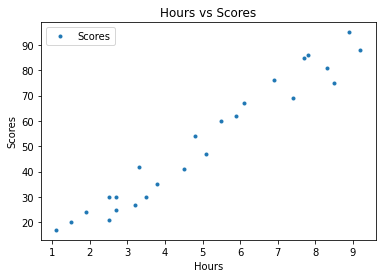

In [11]:
data.plot(x='Hours',y='Scores',style='.')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We are trying to establish a linear relationship between the two variables 'Hours' and 'Scores'

**Preparing the data**

Divide the data into two sets as x(input) and y(output)

In [5]:
x = data.iloc[:,:1].values                                      #Input variable
y = data.iloc[:,-1:].values                                     #Output variable, also known as 'target'

**Split the data into training and testing sets**

We use sklearn method 'train_test_split' to split the data into training and testing sets.

In [6]:
#Dividing the 60% data for training set and 40%  for testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 1)

**Training the model**

Since we prepared the data, we should train our model now.
We will train our data using linear regression model

In [7]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

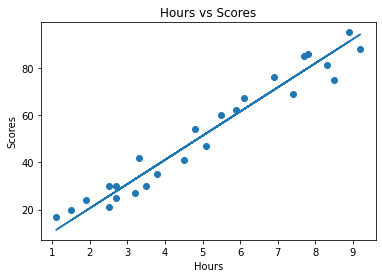

In [8]:
line = reg.coef_*x+reg.intercept_

plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

**Predict the data**

Since we trained our model, we should test it against the testing set

In [9]:
y_pred = reg.predict(x_test)


In [5]:
actual = [i[0] for i in y_test]
pred = [i[0] for i in y_pred]                #These lines are to remove the [] because the data is in the form of numpy.ndarray

l=list(zip(actual,pred))                      #Zip the datasets instead of enumerating and pass it as a list

df = pd.DataFrame(l,columns=['Actual','Predicted'])          
df                                             #Create a dataframe with the passed list

NameError: name 'y_test' is not defined

**Let's calculate the metrics of our model**

Mean absolute error

In [4]:
a = metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error = {:.3f}'.format(a))
#{:.3f} represents the floating number must be precise upto 3 digits

NameError: name 'metrics' is not defined

Cost function of our model after learning

In [3]:
s=0
for i,j in zip(actual,pred):                          #Zipping lists here because, it avoids 'too many values to unpack' error
    s += (i-j)**2

J = s/len(actual)
print('J = {:.3f}'.format(J))

NameError: name 'actual' is not defined

R2 Score of our model

In [2]:
print('R2 Score: {:.3f}'.format(metrics.r2_score(y_test,y_pred)))               #Truncate the result to 3 decimals

NameError: name 'metrics' is not defined

Since our model is prepared, we should predict the 'Score' if a student studies for 9.25 hours everyday

In [14]:
hours = [[9.25]]
prediction = reg.predict(hours)
print('Predicted score = {:.2f}'.format(prediction[0][0]))                     #Truncate the result to 2 decimals
#Since our regressor uses numpy 2d array, we use prediction[][]

Predicted score = 94.65


**According to our model, the student can score upto 94.65% if he studies 9.25 hours everyday**